<a href="https://colab.research.google.com/github/pdwivedi1990/CaptchaCracker/blob/master/Handwriting_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step


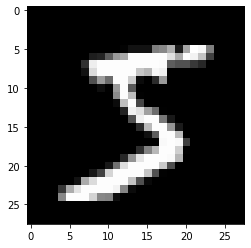

In [3]:
'''
Code by : Pulkit Dwivedi (RCS201003), Sakshi Verma (RSC201001)
We have developed a CNN model for recognising handwritten digits on the MNIST dataset using the Keras.
Data - 6000 train images, 1000 test images where each image is of size 28 *28
The Keras provides a way for loading the MNIST dataset where we can directly import the dataset
'''

#import and load mnist dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot image
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
from keras.utils import np_utils

#load and normalize the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [5]:
# CNN for the MNIST Dataset

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

def CNN():
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
model = CNN()


In [6]:
# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
__________________________________________________

In [9]:
# Fit and evaluate the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
scores = model.evaluate(X_test, y_test)


Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0439 - val_accuracy: 0.9895
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0511 - val_accuracy: 0.9888
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0487 - val_accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0537 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0579 - val_accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0053 - accuracy: 0.9982 - val_loss: 0.0587 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0561 - val_accuracy:

In [10]:
print("Error: %.2f%%" % (100-scores[1]*100))

Error: 1.06%


In [12]:
model.save('CNN_Saved')

INFO:tensorflow:Assets written to: CNN_Saved/assets
